In [22]:
from pycaret.classification import*
from pycaret.datasets import get_data

In [6]:
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [7]:
#check the shape of data
dataset.shape

(24000, 24)

In [8]:
dataset.drop(["AGE","SEX", "EDUCATION", "MARRIAGE","PAY_4","PAY_5","PAY_6","BILL_AMT4","BILL_AMT5","BILL_AMT6", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"],axis=1,inplace=True)

In [9]:
dataset.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default
0,20000,2,2,-1,3913.0,3102.0,689.0,0.0,689.0,0.0,1
1,90000,0,0,0,29239.0,14027.0,13559.0,1518.0,1500.0,1000.0,0
2,50000,0,0,0,46990.0,48233.0,49291.0,2000.0,2019.0,1200.0,0
3,50000,-1,0,-1,8617.0,5670.0,35835.0,2000.0,36681.0,10000.0,0
4,50000,0,0,0,64400.0,57069.0,57608.0,2500.0,1815.0,657.0,0


In [10]:
data = dataset.sample(frac=0.95, random_state=42)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))

Data for Modeling: (22800, 11)


In [11]:
data_unseen.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default
0,260000,-1,-1,-1,12261.0,21670.0,9966.0,21818.0,9966.0,8583.0,0
1,80000,-1,-1,-1,780.0,0.0,390.0,0.0,390.0,390.0,0
2,90000,0,0,0,83725.0,85996.0,87653.0,3621.0,3597.0,1179.0,0
3,80000,1,2,3,9168.0,10522.0,10205.0,1650.0,0.0,0.0,0
4,30000,2,2,2,24357.0,27453.0,26718.0,3500.0,0.0,2200.0,0


In [12]:
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Unseen Data For Predictions: (1200, 11)


In [13]:
exp_clf101 = setup(data = data, target = 'default', session_id=1)

,Description,Value
0,session_id,1
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 11)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
best_model = compare_models(include=['gbc','lda', 'mlp'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8210,0.7778,0.3492,0.6934,0.4641,0.3705,0.4021,1.6510
lda,Linear Discriminant Analysis,0.8207,0.7554,0.3746,0.6757,0.4812,0.3835,0.4083,0.6010
mlp,MLP Classifier,0.6493,0.6129,0.3722,0.4066,0.2795,0.0924,0.1145,0.9460


In [38]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [39]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [40]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8296,0.8014,0.3718,0.7293,0.4925,0.4028,0.4359
1,0.8239,0.7784,0.3549,0.7079,0.4728,0.3808,0.4136
2,0.8277,0.7731,0.3690,0.7198,0.4879,0.3970,0.4290
3,0.8233,0.7994,0.3746,0.6891,0.4854,0.3898,0.4162
4,0.8183,0.7976,0.3070,0.7124,0.4291,0.3408,0.3836
5,0.8195,0.7733,0.3296,0.7006,0.4483,0.3567,0.3931
6,0.8177,0.7611,0.3493,0.6739,0.4601,0.3634,0.3919
7,0.8189,0.7632,0.3549,0.6774,0.4658,0.3693,0.3974
8,0.8264,0.7832,0.3785,0.7016,0.4917,0.3982,0.4258


In [42]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8308,0.8044,0.3718,0.7374,0.4944,0.4058,0.4401
1,0.8252,0.7806,0.3606,0.7111,0.4785,0.3867,0.4189
2,0.8283,0.7709,0.3634,0.7288,0.4850,0.3955,0.4300
3,0.8202,0.7957,0.3690,0.6753,0.4772,0.3797,0.4050
4,0.8189,0.8010,0.3183,0.7062,0.4388,0.3488,0.3883
5,0.8177,0.7731,0.3183,0.6975,0.4371,0.3460,0.3840
6,0.8183,0.7592,0.3408,0.6836,0.4549,0.3602,0.3917
7,0.8170,0.7631,0.3465,0.6721,0.4572,0.3605,0.3891
8,0.8264,0.7876,0.3898,0.6935,0.4991,0.4039,0.4285


In [43]:
#tuned model object is stored in the variable 'tuned_ridge'. 
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


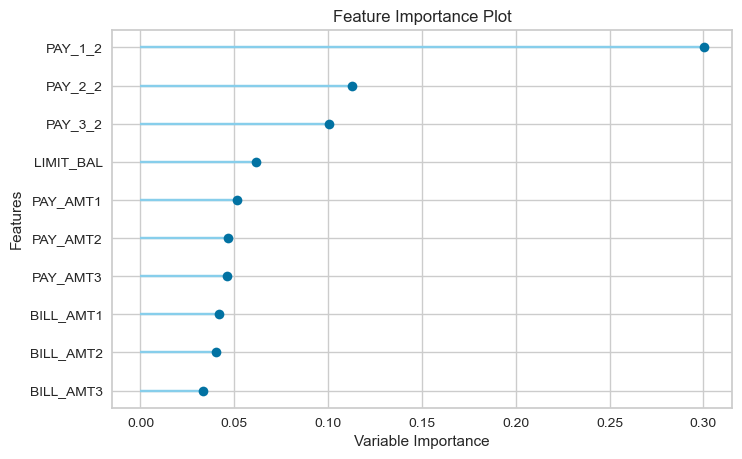

In [44]:
plot_model(tuned_gbc, plot='feature')

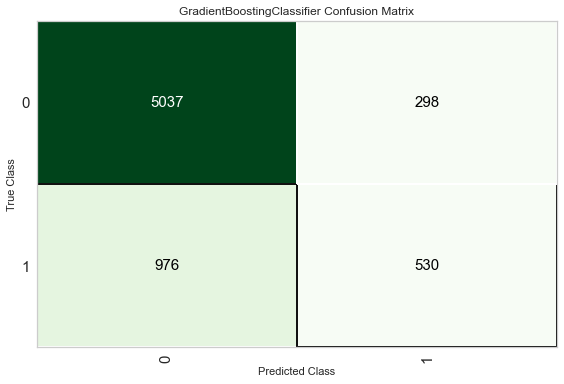

In [46]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [47]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [48]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8138,0.7731,0.3519,0.6401,0.4542,0.3531,0.3761


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_1_-1,PAY_1_-2,PAY_1_0,...,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,default,Label,Score
0,50000.0,36211.0,28530.0,20084.0,1709.0,2004.0,7497.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8649
1,120000.0,2897.0,481.0,721.0,485.0,721.0,444.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8060
2,60000.0,60672.0,58929.0,60335.0,2741.0,3000.0,2300.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8253
3,90000.0,83760.0,80136.0,76823.0,0.0,3365.0,2051.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6265
4,80000.0,39604.0,10635.0,0.0,1000.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.8408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,160000.0,166573.0,158760.0,140777.0,2000.0,5000.0,4600.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8096
6837,10000.0,2778.0,1939.0,2038.0,1939.0,2040.0,1938.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8486
6838,260000.0,0.0,0.0,0.0,0.0,0.0,167.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8388
6839,200000.0,107001.0,108619.0,110149.0,5000.0,5000.0,5000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.9228


In [49]:
final_gbc = finalize_model(tuned_gbc)

In [50]:
#Final Ridge Classifier model parameters for deployment
print(final_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [51]:
predict_model(final_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8208,0.8054,0.3659,0.6703,0.4734,0.3764,0.4015


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_1_-1,PAY_1_-2,PAY_1_0,...,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,default,Label,Score
0,50000.0,36211.0,28530.0,20084.0,1709.0,2004.0,7497.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8671
1,120000.0,2897.0,481.0,721.0,485.0,721.0,444.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7758
2,60000.0,60672.0,58929.0,60335.0,2741.0,3000.0,2300.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8467
3,90000.0,83760.0,80136.0,76823.0,0.0,3365.0,2051.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5981
4,80000.0,39604.0,10635.0,0.0,1000.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.8360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,160000.0,166573.0,158760.0,140777.0,2000.0,5000.0,4600.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7810
6837,10000.0,2778.0,1939.0,2038.0,1939.0,2040.0,1938.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8870
6838,260000.0,0.0,0.0,0.0,0.0,0.0,167.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8120
6839,200000.0,107001.0,108619.0,110149.0,5000.0,5000.0,5000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.8785


In [52]:
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8317,0.7763,0.3333,0.7119,0.4541,0.3696,0.4069


,LIMIT_BAL,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default,Label,Score
0,260000,-1,-1,-1,12261.0,21670.0,9966.0,21818.0,9966.0,8583.0,0,0,0.9422
1,80000,-1,-1,-1,780.0,0.0,390.0,0.0,390.0,390.0,0,0,0.7460
2,90000,0,0,0,83725.0,85996.0,87653.0,3621.0,3597.0,1179.0,0,0,0.8780
3,80000,1,2,3,9168.0,10522.0,10205.0,1650.0,0.0,0.0,0,0,0.5004
4,30000,2,2,2,24357.0,27453.0,26718.0,3500.0,0.0,2200.0,0,1,0.7287


In [53]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')

0.8317

In [ ]:
save_model(final_ridge,'./model')

In [55]:
import joblib

In [56]:
joblib.dump(final_gbc, "final_gbc")

['final_gbc']

In [57]:
data_unseen.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default
0,260000,-1,-1,-1,12261.0,21670.0,9966.0,21818.0,9966.0,8583.0,0
1,80000,-1,-1,-1,780.0,0.0,390.0,0.0,390.0,390.0,0
2,90000,0,0,0,83725.0,85996.0,87653.0,3621.0,3597.0,1179.0,0
3,80000,1,2,3,9168.0,10522.0,10205.0,1650.0,0.0,0.0,0
4,30000,2,2,2,24357.0,27453.0,26718.0,3500.0,0.0,2200.0,0
